In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('conn_profile3.csv')
df.head()

,Nama Connector,Name,COnnector or Not,Gender,Following,Follower,Total Tweet,Pekerjaan,Career_Group
0,waliwali1,Matthew Mendelsohn,1,M,630,1338,"26,823",Writer,Writer
1,tracytrinita,Tracy Trinita,1,F,441,"68,937","22,610",Blogger,Writer
2,tikabanget,Atika Nurkoestanti,1,F,953,22854,155741,"Freelancer Sosmed Marketing, Blogger,",Writer
3,tentanghanny,Hanny,1,F,112,118,23078,Staff Kementrian Keuangan,Staff
4,sydsalesman,Syd Bangbiron,1,M,3878,6239,"444,647",Salesman,Staff


In [2]:
#df['Career_Group'] = df['Career_Group'].fillna(df['Career_Group'].mode()[0])

In [3]:
#df['Total Mentions'] = df['Total Mentions'].apply(lambda x:1 if x >3 else 0)
#df.tail()

In [4]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Pekerjaan,323,12.938005
1,Career_Group,323,12.938005
2,Name,167,54.986523
3,Gender,5,98.652291
4,Nama Connector,0,100.000000
5,COnnector or Not,0,100.000000
6,Following,0,100.000000
7,Follower,0,100.000000
8,Total Tweet,0,100.000000


In [5]:
df.drop(df[['Pekerjaan','Nama Connector','Name','Career_Group']],axis=1,inplace=True)
df.head()

,COnnector or Not,Gender,Following,Follower,Total Tweet
0,1,M,630,1338,"26,823"
1,1,F,441,"68,937","22,610"
2,1,F,953,22854,155741
3,1,F,112,118,23078
4,1,M,3878,6239,"444,647"


In [6]:
df['Gender']=df['Gender'].apply(lambda x:1 if x =='M' else 0)
df['Follower']=df['Follower'].str.replace(",","")
df['Following']=df['Following'].str.replace(",","")
df['Total Tweet']=df['Total Tweet'].str.replace(",","")
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.head()

,COnnector or Not,Gender,Following,Follower,Total Tweet
0,1,1,630,1338,26823
1,1,0,441,68937,22610
2,1,0,953,22854,155741
3,1,0,112,118,23078
4,1,1,3878,6239,444647


In [7]:
df['Gender']=df['Gender'].astype('int')
df['Follower']=df['Follower'].astype('int')
df['Following']=df['Following'].astype('int')
df['Total Tweet']=df['Total Tweet'].astype('int')

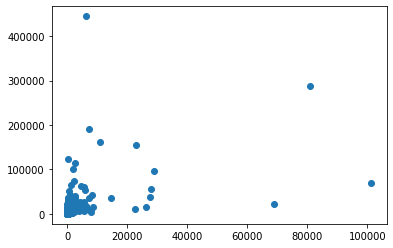

In [8]:
plt.scatter(y=df['Total Tweet'],x=df['Follower'])
plt.show()

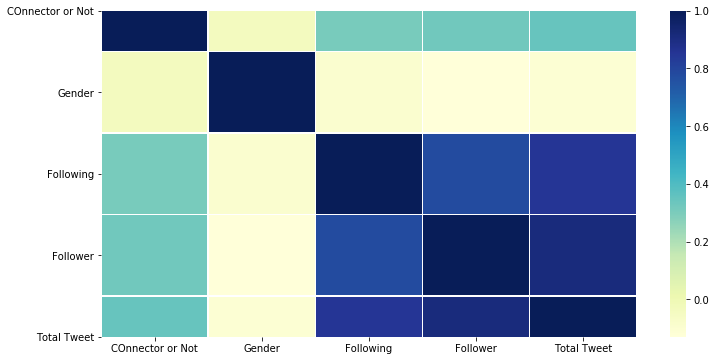

In [9]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [10]:
corr

,COnnector or Not,Gender,Following,Follower,Total Tweet
COnnector or Not,1.000000,-0.033954,0.307254,0.324823,0.350580
Gender,-0.033954,1.000000,-0.094008,-0.130024,-0.103740
Following,0.307254,-0.094008,1.000000,0.780593,0.851027
Follower,0.324823,-0.130024,0.780593,1.000000,0.912587
Total Tweet,0.350580,-0.103740,0.851027,0.912587,1.000000


## Preprocessing Data

In [11]:
from sklearn.preprocessing import scale
#df['Gender']=scale(df['Gender'])
#df['Following']=scale(df['Following'])
#df['Follower']=scale(df['Follower'])
#df['Total Tweet']=scale(df['Total Tweet'])
#Memilih colom sebagai label
y = df['COnnector or Not']
#Mendrop colom
new_df = df.drop(["COnnector or Not"],axis=1)

#Menormalisasi data menjadi 0-1
x =new_df

In [12]:
#Resample atau upsampling menggunakan SMOTE

In [13]:
#!pip install imbalanced_learn

In [14]:
#CEK Imbalanced Data Label (y)
from collections import Counter

counter = Counter(y)
print(counter)

Counter({0: 314, 1: 57})


In [15]:
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.509


In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [17]:

counter = Counter(y)
print(counter)

Counter({1: 314, 0: 314})


In [18]:
#Membagi data menjadi data train dan data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state =1)
x_train=x_train.as_matrix()
y_train=y_train.as_matrix()
x_test=x_test.as_matrix()
y_test=y_test.as_matrix()

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


## Modeling Classification

In [19]:
#!pip install --upgrade scikit-learn
#XGB Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5,booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.5, max_delta_step=0,max_depth=5,
                    min_child_weight=5, missing=None, n_estimators=4,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(x_train,y_train)

[09:35:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=4, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

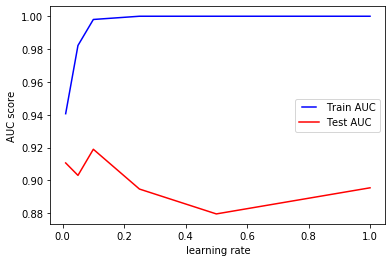

[0.8954545454545455, 0.8795454545454546, 0.8946969696969697, 0.918939393939394, 0.9030303030303031, 0.9106060606060606]


In [20]:
from sklearn.metrics import roc_curve, auc

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = XGBClassifier(learning_rate=eta)
    model.fit(x_train, y_train)   
    train_pred = model.predict(x_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(x_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()
print(test_results)

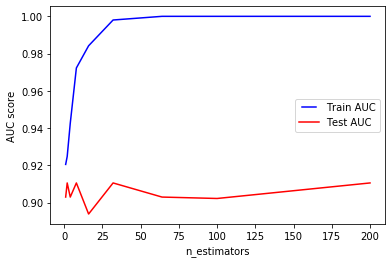

[0.9030303030303031, 0.9106060606060606, 0.9030303030303031, 0.9106060606060606, 0.893939393939394, 0.9106060606060606, 0.9030303030303031, 0.9022727272727273, 0.9106060606060606]


In [21]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = XGBClassifier(n_estimators=estimator)
    model.fit(x_train, y_train)   
    train_pred = model.predict(x_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(x_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
print(test_results)

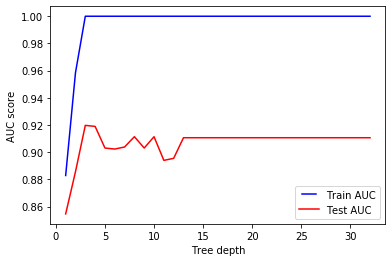

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.] [0.8545454545454546, 0.8856060606060606, 0.9196969696969698, 0.918939393939394, 0.9030303030303031, 0.9022727272727273, 0.9037878787878788, 0.9113636363636364, 0.9030303030303031, 0.9113636363636364, 0.893939393939394, 0.8954545454545455, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606, 0.9106060606060606]


In [22]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model = XGBClassifier(max_depth=max_depth.astype('int'))
    model.fit(x_train, y_train)   
    train_pred = model.predict(x_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = model.predict(x_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
print(max_depths,test_results)

In [23]:
# the function that prints all scores
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [24]:
y_pred = XGB.predict(x_test)
results = confusion_matrix(y_test, y_pred)
results

array([[51,  9],
       [ 3, 63]], dtype=int64)

In [25]:
print(y_test)
print(y_pred)

[1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1]
[1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1]


In [26]:
report_xgb = classification_report(y_test, XGB.predict(x_test))
print(report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        60
           1       0.88      0.95      0.91        66

    accuracy                           0.90       126
   macro avg       0.91      0.90      0.90       126
weighted avg       0.91      0.90      0.90       126



In [27]:
y_pred_xgb = XGB.predict(x_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

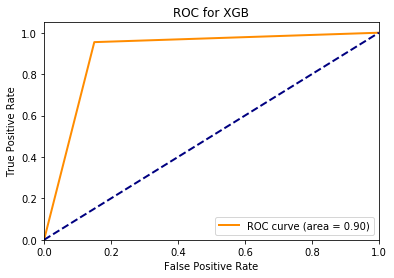

In [28]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for XGB')
plt.legend(loc="lower right")
plt.show()

In [29]:
list(zip(XGB.feature_importances_))

[(0.21499151,), (0.1050406,), (0.20869985,), (0.47126803,)]

## Save model

In [30]:
import joblib
joblib.dump(model, "model.pickle")

['model.pickle']

In [56]:
import joblib
from sklearn.preprocessing import scale
model = joblib.load("model.pickle")
baru=np.array([1, 674, 224,29234]).reshape((1,-1))
x_new = model.predict(baru)
print("Connector") if x_new ==1 else print("Non Connector")

Non Connector
